In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import seaborn as sns
%matplotlib inline

### IBM Watson Notebook link
<b>https://eu-gb.dataplatform.cloud.ibm.com/analytics/notebooks/v2/e1f9540a-0cba-46d6-abf8-7c7d8b39e85c/view?access_token=2581b7a9457fd90aef895f3cd91a591675639e0bfd489e6865cab3307a7d73ee</b>

## Data Wrangling

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_934c9b05f8914de8b2849f2789bb488d = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_934c9b05f8914de8b2849f2789bb488d = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_934c9b05f8914de8b2849f2789bb488d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3ICJ8aE8e6DLH3fLQWyy9NKLpe6QKgZmWGsoj4gSjTMl',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_934c9b05f8914de8b2849f2789bb488d)

body = client_934c9b05f8914de8b2849f2789bb488d.get_object(Bucket='kbbafricacapstoneprojectscikitlea-donotdelete-pr-8vllt3jlddz5lz',Key='USD_FOMC_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,S/N,Month,Year,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates,Unnamed: 12,Unnamed: 13
0,1.0,January,2012.0,53.9,52.6,0.00%,0.10%,-47.8,200.0,8.50%,0.20%,0.25%,NaN,NaN
1,2.0,February,2012.0,54.1,56.8,0.20%,0.40%,-48.8,243.0,8.30%,0.20%,0.25%,NaN,NaN
2,3.0,March,2012.0,52.4,57.3,0.40%,1.10%,-52.6,227.0,8.30%,0.10%,0.25%,NaN,NaN
3,4.0,April,2012.0,53.4,56.0,0.30%,0.80%,-46.0,120.0,8.20%,0.20%,0.25%,NaN,NaN
4,5.0,May,2012.0,54.8,53.5,0.00%,0.10%,-51.8,115.0,8.10%,0.00%,0.25%,NaN,NaN


In [3]:
df_usdfomc = df_data_1
df_usdfomc.columns

Index(['S/N', 'Month', 'Year', 'Man. PMI', 'Non-Man. PMI', 'CPI',
       'Retail Sales', 'Trading Balance', 'Employment Change',
       'Uemployment Rate', 'Hourly Earning', 'FOMC Rates', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')

In [4]:
df_usdfomc.index = df_usdfomc['S/N']
df_usdfomc.drop('S/N', inplace=True, axis=1)

In [5]:
df_usdfomc.head()

,Month,Year,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates,Unnamed: 12,Unnamed: 13
S/N,,,,,,,,,,,,,
1.0,January,2012.0,53.9,52.6,0.00%,0.10%,-47.8,200.0,8.50%,0.20%,0.25%,NaN,NaN
2.0,February,2012.0,54.1,56.8,0.20%,0.40%,-48.8,243.0,8.30%,0.20%,0.25%,NaN,NaN
3.0,March,2012.0,52.4,57.3,0.40%,1.10%,-52.6,227.0,8.30%,0.10%,0.25%,NaN,NaN
4.0,April,2012.0,53.4,56.0,0.30%,0.80%,-46.0,120.0,8.20%,0.20%,0.25%,NaN,NaN
5.0,May,2012.0,54.8,53.5,0.00%,0.10%,-51.8,115.0,8.10%,0.00%,0.25%,NaN,NaN


In [6]:
df = df_usdfomc.drop(['Month', 'Year', 'Unnamed: 12', 'Unnamed: 13'], axis=1)
df.head()

,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates
S/N,,,,,,,,,
1.0,53.9,52.6,0.00%,0.10%,-47.8,200.0,8.50%,0.20%,0.25%
2.0,54.1,56.8,0.20%,0.40%,-48.8,243.0,8.30%,0.20%,0.25%
3.0,52.4,57.3,0.40%,1.10%,-52.6,227.0,8.30%,0.10%,0.25%
4.0,53.4,56.0,0.30%,0.80%,-46.0,120.0,8.20%,0.20%,0.25%
5.0,54.8,53.5,0.00%,0.10%,-51.8,115.0,8.10%,0.00%,0.25%


In [7]:
df.dtypes

Man. PMI             float64
Non-Man. PMI         float64
CPI                   object
Retail Sales          object
Trading Balance      float64
Employment Change    float64
Uemployment Rate      object
Hourly Earning        object
FOMC Rates            object
dtype: object

In [8]:
df = df.replace('%', '', regex=True)
df.head()

,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates
S/N,,,,,,,,,
1.0,53.9,52.6,0.00,0.10,-47.8,200.0,8.50,0.20,0.25
2.0,54.1,56.8,0.20,0.40,-48.8,243.0,8.30,0.20,0.25
3.0,52.4,57.3,0.40,1.10,-52.6,227.0,8.30,0.10,0.25
4.0,53.4,56.0,0.30,0.80,-46.0,120.0,8.20,0.20,0.25
5.0,54.8,53.5,0.00,0.10,-51.8,115.0,8.10,0.00,0.25


In [9]:
df = df.astype(float)

In [10]:
df = df.dropna()
df

,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates
S/N,,,,,,,,,
1.0,53.9,52.6,0.0,0.1,-47.8,200.0,8.5,0.2,0.25
2.0,54.1,56.8,0.2,0.4,-48.8,243.0,8.3,0.2,0.25
3.0,52.4,57.3,0.4,1.1,-52.6,227.0,8.3,0.1,0.25
4.0,53.4,56.0,0.3,0.8,-46.0,120.0,8.2,0.2,0.25
5.0,54.8,53.5,0.0,0.1,-51.8,115.0,8.1,0.0,0.25
...,...,...,...,...,...,...,...,...,...
95.0,48.3,54.7,0.4,0.3,-52.5,128.0,3.6,0.2,1.75
96.0,48.1,53.9,0.3,0.2,-47.2,266.0,3.5,0.2,1.75
97.0,47.2,55.0,0.2,0.3,-43.1,145.0,3.5,0.1,1.75


In [11]:
scale = StandardScaler()
df = pd.DataFrame(scale.fit_transform(df.values), columns=df.columns, index=df.index)
df

,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates
S/N,,,,,,,,,
1.0,-0.005948,-1.556406,-0.545210,-0.316969,-0.459242,0.198698,1.946255,0.077828,-0.781524
2.0,0.050136,0.302697,0.304802,0.278852,-0.644738,0.832775,1.818314,0.077828,-0.781524
3.0,-0.426583,0.524018,1.154815,1.669102,-1.349622,0.596839,1.818314,-0.622628,-0.781524
4.0,-0.146160,-0.051418,0.729809,1.073281,-0.125350,-0.980979,1.754344,0.077828,-0.781524
5.0,0.246433,-1.158027,-0.545210,-0.316969,-1.201225,-1.054709,1.690373,-1.323084,-0.781524
...,...,...,...,...,...,...,...,...,...
95.0,-1.576319,-0.626855,1.154815,0.080245,-1.331072,-0.863011,-1.188301,0.077828,1.128868
96.0,-1.632404,-0.980969,0.729809,-0.118362,-0.347945,1.171932,-1.252272,0.077828,1.128868
97.0,-1.884785,-0.494062,0.304802,0.080245,0.412587,-0.612330,-1.252272,-0.622628,1.128868


## Exploaratory Analysis

In [12]:
df.corr(method ='pearson')

,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates
Man. PMI,1.000000,0.569402,0.045272,0.077324,-0.148790,0.089001,-0.189863,0.065144,0.295408
Non-Man. PMI,0.569402,1.000000,0.024034,0.053144,-0.262010,0.210160,-0.409789,0.170929,0.332231
CPI,0.045272,0.024034,1.000000,0.493933,0.006832,-0.036571,-0.084069,0.069496,0.128860
Retail Sales,0.077324,0.053144,0.493933,1.000000,0.052519,-0.178322,0.067764,0.183458,0.025666
Trading Balance,-0.148790,-0.262010,0.006832,0.052519,1.000000,-0.075780,0.395336,-0.152987,-0.665970
Employment Change,0.089001,0.210160,-0.036571,-0.178322,-0.075780,1.000000,-0.150738,-0.119484,-0.017103
Uemployment Rate,-0.189863,-0.409789,-0.084069,0.067764,0.395336,-0.150738,1.000000,-0.226608,-0.755454
Hourly Earning,0.065144,0.170929,0.069496,0.183458,-0.152987,-0.119484,-0.226608,1.000000,0.214013
FOMC Rates,0.295408,0.332231,0.128860,0.025666,-0.665970,-0.017103,-0.755454,0.214013,1.000000


In [13]:
lm = LinearRegression()

In [14]:
X = df[['Trading Balance', 'Uemployment Rate']]
#X = df[['Uemployment Rate']]
Y = df['FOMC Rates']

In [15]:
lm.fit(X,Y)
lm.score(X,Y)

0.7306213010927579

In [16]:
X = df.drop('FOMC Rates', axis=1)

lm.fit(X, Y)
lm.score(X, Y)

0.7803063842404532

In [17]:
lm.intercept_

-3.3424053037076126e-16

In [18]:
lm.coef_

array([ 0.18566459, -0.11411746,  0.05370987,  0.03438539, -0.43947103,
       -0.12840298, -0.61267104, -0.01002786])

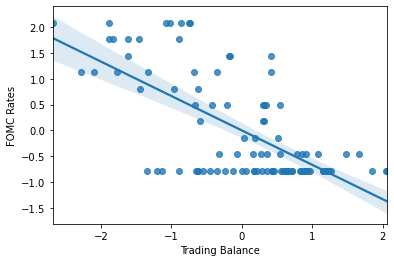

In [19]:
sns.regplot(x='Trading Balance', y='FOMC Rates', data=df)

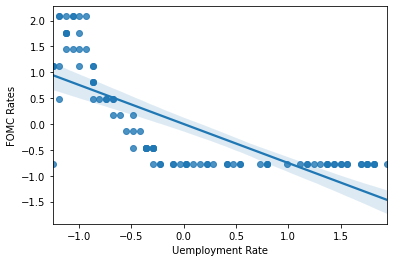

In [20]:
sns.regplot(x='Uemployment Rate', y='FOMC Rates', data=df)

## Model Building and Evaluation

### First Trial and Comparison

In [21]:
lm_scores = []
rm_scores = []
rm=Ridge(alpha=0.1)
M = df[['Trading Balance', 'Uemployment Rate']]
for degree in list(range(1,8)):
    pr = PolynomialFeatures(degree=degree)
    M_poly = pr.fit_transform(M)
    lm.fit(M_poly, Y)
    rm.fit(M_poly, Y)
    lm_scores.append(lm.score(M_poly, Y))
    rm_scores.append(rm.score(M_poly, Y))
lm_score = dict(zip(list(range(1,8)), lm_scores))
rm_score = dict(zip(list(range(1,8)), rm_scores))

In [22]:
print(lm_score)
print(rm_score)

{1: 0.7306213010927578, 2: 0.8610865645457708, 3: 0.8627666308844101, 4: 0.8920563324638355, 5: 0.9241854844672343, 6: 0.9407413558607799, 7: 0.9515962830803306}
{1: 0.7306209038137704, 2: 0.8610830444878241, 3: 0.8627531620173233, 4: 0.8919024867617378, 5: 0.9235234723955863, 6: 0.9382510804580383, 7: 0.95055696859804}


### Second Trial and Comparison

In [23]:
lm_scores = []
M = df[['Trading Balance', 'Uemployment Rate']]
M_train, M_test, Y_train, Y_test = train_test_split(M, Y, test_size=0.2, random_state=1)
for degree in list(range(1,8)):
    pr = PolynomialFeatures(degree=degree)
    M_poly1 = pr.fit_transform(M_train)
    M_poly2 = pr.fit_transform(M_test)
    lm.fit(M_poly1, Y_train)
    lin_score = {'train_score': lm.score(M_poly1, Y_train), 'test_score': lm.score(M_poly2, Y_test)}
    lm_scores.append(lin_score)
lm_score = dict(zip(list(range(1,8)), lm_scores))

In [24]:
rm_scores = []
rm=Ridge(alpha=0.1)
M = df[['Trading Balance', 'Uemployment Rate']]
M_train, M_test, Y_train, Y_test = train_test_split(M, Y, test_size=0.2, random_state=1)
for degree in list(range(1,8)):
    pr = PolynomialFeatures(degree=degree)
    M_poly1 = pr.fit_transform(M_train)
    M_poly2 = pr.fit_transform(M_test)
    rm.fit(M_poly1, Y_train)
    lin_score = {'train_score': rm.score(M_poly1, Y_train), 'test_score': rm.score(M_poly2, Y_test)}
    rm_scores.append(lin_score)
rm_score = dict(zip(list(range(1,8)), rm_scores))

In [25]:
print(lm_score)
print()
print(rm_score)

{1: {'train_score': 0.7175828551712398, 'test_score': 0.6801054173454182}, 2: {'train_score': 0.844222468730524, 'test_score': 0.8467898200338535}, 3: {'train_score': 0.8458564645883092, 'test_score': 0.8478330279723322}, 4: {'train_score': 0.8813924742101967, 'test_score': 0.8695383148177102}, 5: {'train_score': 0.9131895511489789, 'test_score': 0.914000708724174}, 6: {'train_score': 0.930482623291795, 'test_score': 0.9246667141627015}, 7: {'train_score': 0.9458924964177128, 'test_score': 0.9338373129488304}}

{1: {'train_score': 0.7175822065958775, 'test_score': 0.6797000526389367}, 2: {'train_score': 0.8442176657277016, 'test_score': 0.8457960694674818}, 3: {'train_score': 0.8458368099604603, 'test_score': 0.8470341564399054}, 4: {'train_score': 0.8811693927417364, 'test_score': 0.8673481195551382}, 5: {'train_score': 0.9124208697344375, 'test_score': 0.9059061796341652}, 6: {'train_score': 0.9282217440184857, 'test_score': 0.9235161338704173}, 7: {'train_score': 0.9393230379190667,

### Third trial and Comparison

In [26]:
lm_scores = []
M = df.drop('FOMC Rates', axis=1)
M_train, M_test, Y_train, Y_test = train_test_split(M, Y, test_size=0.2, random_state=1)
for degree in list(range(1,4)):
    pr = PolynomialFeatures(degree=degree)
    M_poly1 = pr.fit_transform(M_train)
    M_poly2 = pr.fit_transform(M_test)
    lm.fit(M_poly1, Y_train)
    lin_score = {'train_score': lm.score(M_poly1, Y_train), 'test_score': lm.score(M_poly2, Y_test)}
    lm_scores.append(lin_score)
lm_score = dict(zip(list(range(1,4)), lm_scores))

In [27]:
rm_scores = []
rm=Ridge(alpha=0.1)
M = df.drop('FOMC Rates', axis=1)
M_train, M_test, Y_train, Y_test = train_test_split(M, Y, test_size=0.2, random_state=1)
for degree in list(range(1,4)):
    pr = PolynomialFeatures(degree=degree)
    M_poly1 = pr.fit_transform(M_train)
    M_poly2 = pr.fit_transform(M_test)
    rm.fit(M_poly1, Y_train)
    rig_score = {'train_score': rm.score(M_poly1, Y_train), 'test_score': rm.score(M_poly2, Y_test)}
    rm_scores.append(rig_score)
rm_score = dict(zip(list(range(1,4)), rm_scores))

In [28]:
print(lm_score)
print()
print(rm_score)

{1: {'train_score': 0.7653545793796797, 'test_score': 0.7348393697819329}, 2: {'train_score': 0.9440583147812138, 'test_score': 0.787516634210355}, 3: {'train_score': 1.0, 'test_score': 0.7280224011943892}}

{1: {'train_score': 0.7653533551464166, 'test_score': 0.7343923155471934}, 2: {'train_score': 0.9440309521054407, 'test_score': 0.7915784033491706}, 3: {'train_score': 0.999985429900726, 'test_score': 0.732927503032373}}


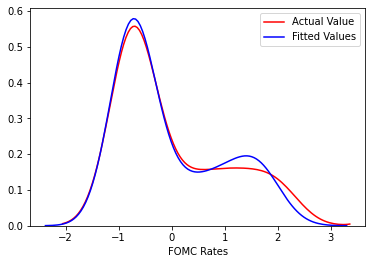

In [29]:
M = df[['Trading Balance', 'Uemployment Rate']]
M_train, M_test, Y_train, Y_test = train_test_split(M, Y, test_size=0.2, random_state=1)
pr = PolynomialFeatures(degree=7)
M_poly = pr.fit_transform(M)
M_poly1 = pr.fit_transform(M_train)
M_poly2 = pr.fit_transform(M_test)
lm.fit(M_poly1, Y_train)
Y_hatlm = lm.predict(M_poly)
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hatlm, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [30]:
mse = mean_squared_error(Y, Y_hatlm)
mse

0.05478357498142237

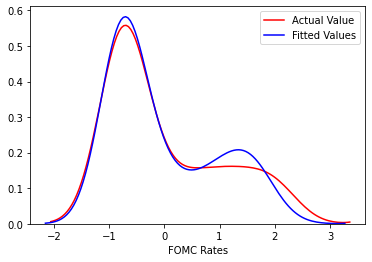

In [31]:
rm=Ridge(alpha=0.1)
M = df[['Trading Balance', 'Uemployment Rate']]
M_train, M_test, Y_train, Y_test = train_test_split(M, Y, test_size=0.2, random_state=1)
pr = PolynomialFeatures(degree=7)
M_poly = pr.fit_transform(M)
M_poly1 = pr.fit_transform(M_train)
M_poly2 = pr.fit_transform(M_test)
rm.fit(M_poly1, Y_train)
Y_hatrm = rm.predict(M_poly)
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hatrm, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [32]:
mse = mean_squared_error(Y, Y_hatrm)
mse

0.0567698366923413

### Fourth Trial and Comparison

In [33]:
rm_scores = []
pr = PolynomialFeatures(degree=7)
M = df[['Trading Balance', 'Uemployment Rate']]
M_train, M_test, Y_train, Y_test = train_test_split(M, Y, test_size=0.2, random_state=1)
for alpha in [x * 0.01 for x in range(1, 11)]:
    rm=Ridge(alpha=alpha)
    M_poly1 = pr.fit_transform(M_train)
    M_poly2 = pr.fit_transform(M_test)
    rm.fit(M_poly1, Y_train)
    rig_score = {'train_score': rm.score(M_poly1, Y_train), 'test_score': rm.score(M_poly2, Y_test)}
    rm_scores.append(rig_score)
rm_score = dict(zip([x * 0.01 for x in range(1, 11)], rm_scores))

In [34]:
print(rm_score)

{0.01: {'train_score': 0.9450097243601089, 'test_score': 0.9381199707018032}, 0.02: {'train_score': 0.9439570262437041, 'test_score': 0.9406523762225736}, 0.03: {'train_score': 0.9430552394564029, 'test_score': 0.9418426012195809}, 0.04: {'train_score': 0.9422926998125088, 'test_score': 0.9423745923841258}, 0.05: {'train_score': 0.9416390216038559, 'test_score': 0.9425518542529371}, 0.06: {'train_score': 0.9410692360825759, 'test_score': 0.9425231830526092}, 0.07: {'train_score': 0.9405647811535267, 'test_score': 0.9423684583729693}, 0.08: {'train_score': 0.9401119770872159, 'test_score': 0.9421336294248004}, 0.09: {'train_score': 0.9397006324212686, 'test_score': 0.9418465639245255}, 0.1: {'train_score': 0.9393230379190667, 'test_score': 0.9415248787662269}}


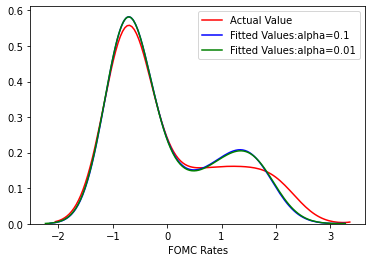

In [35]:
rm=Ridge(alpha=0.1)
rm1=Ridge(alpha=0.05)
M = df[['Trading Balance', 'Uemployment Rate']]
M_train, M_test, Y_train, Y_test = train_test_split(M, Y, test_size=0.2, random_state=1)
pr = PolynomialFeatures(degree=7)
M_poly = pr.fit_transform(M)
M_poly1 = pr.fit_transform(M_train)
M_poly2 = pr.fit_transform(M_test)
rm.fit(M_poly1, Y_train)
rm1.fit(M_poly1, Y_train)
Y_hatrm = rm.predict(M_poly)
Y_hatrm1 = rm1.predict(M_poly)
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hatrm, hist=False, color="b", label="Fitted Values:alpha=0.1" , ax=ax1)
sns.distplot(Y_hatrm1, hist=False, color="g", label="Fitted Values:alpha=0.01" , ax=ax1)

In [36]:
mse = mean_squared_error(Y, Y_hatrm)
mse1 = mean_squared_error(Y, Y_hatrm1)
print(mse, mse1)

0.0567698366923413 0.05496057053739043


## Extracting Descriptors of Optimal Model

In [37]:
#Lists out the arrangement of the polynomial transformed terms of the independent variables with their powers
pr.get_feature_names(M_train.columns)

['1',
 'Trading Balance',
 'Uemployment Rate',
 'Trading Balance^2',
 'Trading Balance Uemployment Rate',
 'Uemployment Rate^2',
 'Trading Balance^3',
 'Trading Balance^2 Uemployment Rate',
 'Trading Balance Uemployment Rate^2',
 'Uemployment Rate^3',
 'Trading Balance^4',
 'Trading Balance^3 Uemployment Rate',
 'Trading Balance^2 Uemployment Rate^2',
 'Trading Balance Uemployment Rate^3',
 'Uemployment Rate^4',
 'Trading Balance^5',
 'Trading Balance^4 Uemployment Rate',
 'Trading Balance^3 Uemployment Rate^2',
 'Trading Balance^2 Uemployment Rate^3',
 'Trading Balance Uemployment Rate^4',
 'Uemployment Rate^5',
 'Trading Balance^6',
 'Trading Balance^5 Uemployment Rate',
 'Trading Balance^4 Uemployment Rate^2',
 'Trading Balance^3 Uemployment Rate^3',
 'Trading Balance^2 Uemployment Rate^4',
 'Trading Balance Uemployment Rate^5',
 'Uemployment Rate^6',
 'Trading Balance^7',
 'Trading Balance^6 Uemployment Rate',
 'Trading Balance^5 Uemployment Rate^2',
 'Trading Balance^4 Uemployment

In [38]:
rm.coef_

array([ 0.        , -0.13950799, -0.52813869, -0.05468749,  0.13586981,
        0.81312428,  0.10124449,  0.21887012, -0.03820203, -0.81067588,
        0.03496178, -0.29243194,  0.10050303,  0.47004568,  0.48822907,
        0.01219839, -0.06129322,  0.30555979, -0.8209997 , -0.12616428,
        0.34275282, -0.066232  ,  0.30619267, -0.19433958, -0.486442  ,
        0.7248154 , -0.34667044, -0.55574278,  0.02212854, -0.07302594,
       -0.09856871,  0.24799744,  0.17482307, -0.21230514,  0.15610269,
        0.1684294 ])

In [39]:
rm.intercept_

-0.6951432422721888

In [42]:
#Lists out the arrangement of the powers of the polynomial transformed terms of the independent variables
pr.powers_

array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2],
       [3, 0],
       [2, 1],
       [1, 2],
       [0, 3],
       [4, 0],
       [3, 1],
       [2, 2],
       [1, 3],
       [0, 4],
       [5, 0],
       [4, 1],
       [3, 2],
       [2, 3],
       [1, 4],
       [0, 5],
       [6, 0],
       [5, 1],
       [4, 2],
       [3, 3],
       [2, 4],
       [1, 5],
       [0, 6],
       [7, 0],
       [6, 1],
       [5, 2],
       [4, 3],
       [3, 4],
       [2, 5],
       [1, 6],
       [0, 7]])